In [2]:
# Imports
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import  matplotlib.pyplot as plt

/usr/lib64/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [38]:
data = fetch_olivetti_faces()
images = data.images.reshape((-1, 1, 64, 64))
labels = np.arange(len(images))
images_tensor = torch.tensor(images, dtype=torch.float32)
labels_tensor = torch.tensor(data.target, dtype=torch.long)
dataset = torch.utils.data.TensorDataset(images_tensor, labels_tensor)

index_to_split = int(0.2 * len(images))
test_set = torch.utils.data.TensorDataset(images_tensor, labels_tensor)
image, label = test_set[20]
print(image)
print(label)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

tensor([[[0.5785, 0.6033, 0.6322,  ..., 0.2769, 0.2066, 0.1860],
         [0.5537, 0.5785, 0.6116,  ..., 0.2727, 0.1942, 0.1694],
         [0.5331, 0.5826, 0.6033,  ..., 0.2562, 0.1860, 0.1612],
         ...,
         [0.2438, 0.4711, 0.5000,  ..., 0.1446, 0.1653, 0.1653],
         [0.2397, 0.4793, 0.5041,  ..., 0.1488, 0.1694, 0.1694],
         [0.2273, 0.4876, 0.5165,  ..., 0.1777, 0.1612, 0.1529]]])
tensor(2)


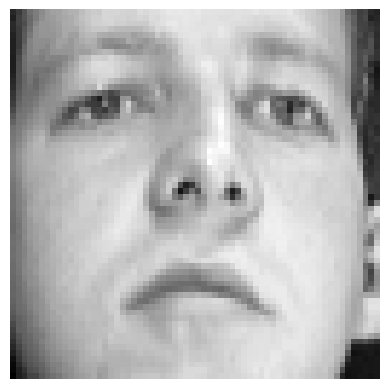

In [16]:
# Display a picture of dataset
def show_picture(picture_index: int):
    image = data.images[picture_index]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
show_picture(8)

In [42]:
# Each picture of the dataset is square 64px x 64px
picture_size = 64

class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc2 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc3 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc4 = nn.Linear(picture_size * picture_size, 40)

    def forward(self, x):
        # Forward pass through the layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [52]:
EPOCH = 100

model = CNN_model()
loss_fonct = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(EPOCH): #training
    for batch in train_loader:
        optimizer.zero_grad()
        images, labels = batch
        output = model.forward(images.reshape(images.shape[0], 64 * 64))
        loss = loss_fonct(output, labels)
        loss.backward()
        optimizer.step()
    print("loss:", loss.item())

total, correct = 0, 0
for image, label in test_set:
    output = model.forward(image.reshape(1, 64 * 64))
    if (output.argmax(dim=1).item() == label):
        correct += 1
    total += 1

print("Accuracy: ", str(correct / total * 100) + "%")
if (correct / total * 100 > 95):
    torch.save(model, 'save/model.pt')

loss: 3.765451431274414
loss: 3.728684186935425
loss: 3.699770927429199
loss: 3.6314339637756348
loss: 3.556973934173584
loss: 3.335460901260376
loss: 3.2836146354675293
loss: 3.0850913524627686
loss: 3.1556639671325684
loss: 2.8062853813171387
loss: 2.3046412467956543
loss: 2.308802604675293
loss: 1.7983005046844482
loss: 1.5774199962615967
loss: 1.7829588651657104
loss: 1.987127661705017
loss: 1.424532413482666
loss: 1.2883293628692627
loss: 1.345719575881958
loss: 1.622786521911621
loss: 1.4172306060791016
loss: 0.9437979459762573
loss: 1.0358349084854126
loss: 0.7290633320808411
loss: 0.333121120929718
loss: 0.6810296177864075
loss: 0.8559070825576782
loss: 0.6381418108940125
loss: 0.5094340443611145
loss: 0.8212660551071167
loss: 0.33356115221977234
loss: 0.5670693516731262
loss: 0.22707504034042358
loss: 0.44055548310279846
loss: 0.4372106194496155
loss: 0.3355337679386139
loss: 0.3379516303539276
loss: 0.3184938132762909
loss: 0.2402958869934082
loss: 0.18295173346996307
loss: 0